# Brief Description

In 2021 there has been a contentious debate if vaccines have proved to be effective over Covid 19. The purpose of this project is to conduct a hypothesis test to draw an inference if these vaccines are reducing fatalities.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Importing the csv files and doing some data cleaning

In [2]:
global_data = pd.read_csv('WHO COVID-19 global table data September 2nd 2021 at 2.32.54 PM.csv')
global_data.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,217558771,"2,791.17",4455323,57.16,527942,4517240,57.95,66630,0.85,7308,NaN
United States of America,Americas,38923013,"11,759.12",1106774,334.37,120560,634320,191.64,9274,2.80,744,NaN
India,South-East Asia,32810845,"2,377.59",298479,21.63,41965,439020,31.81,3262,0.24,460,NaN
Brazil,Americas,20752281,"9,763.05",168287,79.17,10466,579574,272.66,4726,2.22,266,NaN
Russian Federation,Europe,6937333,"4,753.73",132423,90.74,18368,184014,126.09,5591,3.83,790,NaN


In [3]:
#dropping unnecessary tables and renaming the columns that shifted when creating the data frame
global_data_new = global_data.filter(['WHO Region',
                                      'Cases - newly reported in last 24 hours', 
                                      'Deaths - cumulative total per 100000 population',
                                     'Cases - cumulative total per 100000 population'], 
                                     axis=1)
global_data_new

,WHO Region,Cases - newly reported in last 24 hours,Deaths - cumulative total per 100000 population,Cases - cumulative total per 100000 population
Global,217558771,4517240,66630,4455323
United States of America,38923013,634320,9274,1106774
India,32810845,439020,3262,298479
Brazil,20752281,579574,4726,168287
Russian Federation,6937333,184014,5591,132423
...,...,...,...,...
Saint Helena,0,0,0,0
Tokelau,0,0,0,0
Tonga,0,0,0,0
Turkmenistan,0,0,0,0


In [4]:
#renaming the columns shifted when creating the data frame
global_data_final = global_data_new.rename(columns={'WHO Region': 'Cumulative Cases', 
                                           'Cases - newly reported in last 24 hours':'Cumulative Deaths',
                                            'Deaths - cumulative total per 100000 population':'New Deaths in the last 7 days',
                                            'Cases - cumulative total per 100000 population': 'New Cases in the last 7 days'})

global_data_final

,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
Global,217558771,4517240,66630,4455323
United States of America,38923013,634320,9274,1106774
India,32810845,439020,3262,298479
Brazil,20752281,579574,4726,168287
Russian Federation,6937333,184014,5591,132423
...,...,...,...,...
Saint Helena,0,0,0,0
Tokelau,0,0,0,0
Tonga,0,0,0,0
Turkmenistan,0,0,0,0


In [5]:
#deleting rows that have recorded zero cases  
global_data_final_2 = global_data_final[(global_data_final.T != 0).any()]
global_data_final_2

,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
Global,217558771,4517240,66630,4455323
United States of America,38923013,634320,9274,1106774
India,32810845,439020,3262,298479
Brazil,20752281,579574,4726,168287
Russian Federation,6937333,184014,5591,132423
...,...,...,...,...
Saba,11,0,0,1
Marshall Islands,4,0,0,0
Vanuatu,3,0,0,0
Palau,2,0,0,0


In [6]:
#removing the Global row 
global_data_final_2 = global_data_final_2.drop(labels = 'Global', axis=0)
global_data_final_2

,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
United States of America,38923013,634320,9274,1106774
India,32810845,439020,3262,298479
Brazil,20752281,579574,4726,168287
Russian Federation,6937333,184014,5591,132423
The United Kingdom,6789585,132535,681,234381
...,...,...,...,...
Saba,11,0,0,1
Marshall Islands,4,0,0,0
Vanuatu,3,0,0,0
Palau,2,0,0,0


In [7]:
#Sorting the dataframe alphabetically by index
global_data_final_2 = global_data_final_2.sort_index()
global_data_final_2

,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
Afghanistan,153260,7123,33,538
Albania,146387,2498,18,5866
Algeria,196080,5269,206,3454
Andorra,15033,130,0,30
Angola,47544,1217,51,1204
...,...,...,...,...
Wallis and Futuna,454,7,0,0
Yemen,7869,1472,48,289
Zambia,206327,3602,19,1350
Zimbabwe,124773,4419,99,1453


In [8]:
#Adding new calulated columns 'Death Rate Cumulative' and 'Death Rate last 7 days' 
global_data_final_2['Death Rate - Cumulative'] = global_data_final_2['Cumulative Deaths']/global_data_final_2['Cumulative Cases']
    
global_data_final_2['Death Rate last 7 days'] = global_data_final_2['New Deaths in the last 7 days']/global_data_final_2['New Cases in the last 7 days']
    
global_data_final_2

,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days
Afghanistan,153260,7123,33,538,0.05,0.06
Albania,146387,2498,18,5866,0.02,0.00
Algeria,196080,5269,206,3454,0.03,0.06
Andorra,15033,130,0,30,0.01,0.00
Angola,47544,1217,51,1204,0.03,0.04
...,...,...,...,...,...,...
Wallis and Futuna,454,7,0,0,0.02,NaN
Yemen,7869,1472,48,289,0.19,0.17
Zambia,206327,3602,19,1350,0.02,0.01
Zimbabwe,124773,4419,99,1453,0.04,0.07


In [9]:
#Resting the index
global_data_final_2.reset_index(inplace=True) 

#renaming column
global_data_final_2 = global_data_final_2.rename(columns={'index':'Country'})
global_data_final_2

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days
0,Afghanistan,153260,7123,33,538,0.05,0.06
1,Albania,146387,2498,18,5866,0.02,0.00
2,Algeria,196080,5269,206,3454,0.03,0.06
3,Andorra,15033,130,0,30,0.01,0.00
4,Angola,47544,1217,51,1204,0.03,0.04
...,...,...,...,...,...,...,...
219,Wallis and Futuna,454,7,0,0,0.02,NaN
220,Yemen,7869,1472,48,289,0.19,0.17
221,Zambia,206327,3602,19,1350,0.02,0.01
222,Zimbabwe,124773,4419,99,1453,0.04,0.07


In [10]:
#rearranging the columns
column_names = ['Country', 
                'Cumulative Cases', 
                'Cumulative Deaths', 
                'Death Rate - Cumulative', 
                'New Cases in the last 7 days', 
                'New Deaths in the last 7 days',
                'Death Rate last 7 days']

global_data_final_2 = global_data_final_2.reindex(columns = column_names)

global_data_final_2

,Country,Cumulative Cases,Cumulative Deaths,Death Rate - Cumulative,New Cases in the last 7 days,New Deaths in the last 7 days,Death Rate last 7 days
0,Afghanistan,153260,7123,0.05,538,33,0.06
1,Albania,146387,2498,0.02,5866,18,0.00
2,Algeria,196080,5269,0.03,3454,206,0.06
3,Andorra,15033,130,0.01,30,0,0.00
4,Angola,47544,1217,0.03,1204,51,0.04
...,...,...,...,...,...,...,...
219,Wallis and Futuna,454,7,0.02,0,0,NaN
220,Yemen,7869,1472,0.19,289,48,0.17
221,Zambia,206327,3602,0.02,1350,19,0.01
222,Zimbabwe,124773,4419,0.04,1453,99,0.07


In [11]:
vaccination_data = pd.read_csv('vaccination-data.csv')
vaccination_data

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,"1,201,286.00","770,542.00",3.09,1.98,"430,744.00",1.11,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.00
1,Albania,ALB,EURO,OWID,2021-08-27,"1,427,977.00","812,555.00",49.62,28.23,"615,422.00",21.39,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.00
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,"4,146,091.00","3,421,279.00",9.46,7.80,"724,812.00",1.65,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.00
3,American Samoa,ASM,WPRO,REPORTING,2021-08-20,"54,425.00","29,993.00",98.60,54.34,"24,977.00",45.25,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.00
4,Andorra,AND,EURO,OWID,2021-08-15,"91,660.00","51,044.00",118.63,66.06,"40,616.00",52.57,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Viet Nam,VNM,WPRO,REPORTING,2021-08-20,"16,306,199.00","14,669,827.00",16.75,15.07,"1,636,372.00",1.68,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,5.00
223,Wallis and Futuna,WLF,WPRO,REPORTING,2021-07-22,"9,276.00","4,674.00",82.48,41.56,"4,602.00",40.92,Moderna - mRNA-1273,2021-03-19,1.00
224,Yemen,YEM,EMRO,REPORTING,2021-07-27,"311,483.00","298,161.00",1.04,1.00,"13,322.00",0.04,SII - Covishield,2021-04-20,1.00
225,Zambia,ZMB,AFRO,REPORTING,2021-08-23,"503,707.00","303,966.00",2.74,1.65,"199,741.00",1.09,SII - Covishield,2021-04-14,1.00


In [12]:
#Removig unncessary columns
vaccination_data_cleaned = vaccination_data.filter(['COUNTRY',
                                                    'PERSONS_FULLY_VACCINATED_PER100'], 
                                                   axis=1)
vaccination_data_cleaned

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57
...,...,...
222,Viet Nam,1.68
223,Wallis and Futuna,40.92
224,Yemen,0.04
225,Zambia,1.09


In [13]:
#renaming columns
vaccination_data_cleaned = vaccination_data_cleaned.rename(columns={'COUNTRY':'Country', 
                                                                    'PERSONS_FULLY_VACCINATED_PER100':'Fully Vaccinated per 100'})
vaccination_data_cleaned

,Country,Fully Vaccinated per 100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57
...,...,...
222,Viet Nam,1.68
223,Wallis and Futuna,40.92
224,Yemen,0.04
225,Zambia,1.09


In [14]:
#merging the two dataframes 
global_cases_deaths_vax = pd.merge(left=global_data_final_2, 
                                   right=vaccination_data_cleaned, 
                                   left_on='Country', 
                                   right_on='Country')

global_cases_deaths_vax

,Country,Cumulative Cases,Cumulative Deaths,Death Rate - Cumulative,New Cases in the last 7 days,New Deaths in the last 7 days,Death Rate last 7 days,Fully Vaccinated per 100
0,Afghanistan,153260,7123,0.05,538,33,0.06,1.11
1,Albania,146387,2498,0.02,5866,18,0.00,21.39
2,Algeria,196080,5269,0.03,3454,206,0.06,1.65
3,Andorra,15033,130,0.01,30,0,0.00,52.57
4,Angola,47544,1217,0.03,1204,51,0.04,2.57
...,...,...,...,...,...,...,...,...
207,Viet Nam,462092,11064,0.02,92825,2050,0.02,1.68
208,Wallis and Futuna,454,7,0.02,0,0,NaN,40.92
209,Yemen,7869,1472,0.19,289,48,0.17,0.04
210,Zambia,206327,3602,0.02,1350,19,0.01,1.09


In [15]:
#Checking if there are Null values
global_cases_deaths_vax.isnull().values.any()

True

In [16]:
#Removing rows with null values so as to work with a clean and complete dataframe
global_cases_deaths_vax = global_cases_deaths_vax.dropna(how = 'any', axis = 0)
global_cases_deaths_vax

,Country,Cumulative Cases,Cumulative Deaths,Death Rate - Cumulative,New Cases in the last 7 days,New Deaths in the last 7 days,Death Rate last 7 days,Fully Vaccinated per 100
0,Afghanistan,153260,7123,0.05,538,33,0.06,1.11
1,Albania,146387,2498,0.02,5866,18,0.00,21.39
2,Algeria,196080,5269,0.03,3454,206,0.06,1.65
3,Andorra,15033,130,0.01,30,0,0.00,52.57
4,Angola,47544,1217,0.03,1204,51,0.04,2.57
...,...,...,...,...,...,...,...,...
206,Venezuela (Bolivarian Republic of),334343,4010,0.01,7821,101,0.01,11.70
207,Viet Nam,462092,11064,0.02,92825,2050,0.02,1.68
209,Yemen,7869,1472,0.19,289,48,0.17,0.04
210,Zambia,206327,3602,0.02,1350,19,0.01,1.09


In [17]:
global_cases_deaths_vax.isnull().values.any()

False

In [18]:
#removing rows with an infs error
global_cases_deaths_vax = global_cases_deaths_vax.drop(69, axis=0)
global_cases_deaths_vax

#saving as a csv
global_cases_deaths_vax.to_csv('Global Covid data.csv')

# Data Visualisation of Top 10 Countries in terms of Cases, Deaths and Vaccination Rates

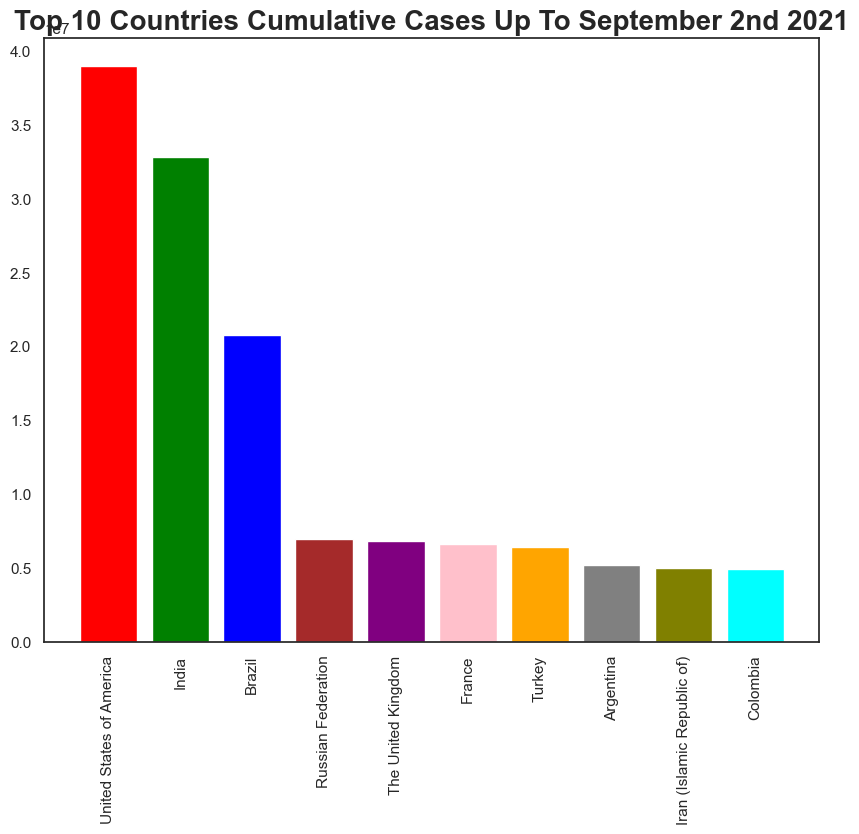

In [19]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative cases
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax.sort_values('Cumulative Cases', ascending = False)
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax_sorted_desc_cases.iloc[:10]
plt.bar(global_cases_deaths_vax_sorted_desc_cases['Country'], global_cases_deaths_vax_sorted_desc_cases['Cumulative Cases'], color = ['red','green','blue','brown', 'purple', 'pink', 'orange','gray', 'olive', 'cyan'])
plt.xticks(rotation = 90)
plt.title('Top 10 Countries Cumulative Cases Up To September 2nd 2021', fontweight = 'bold', fontsize = 20)
plt.show()

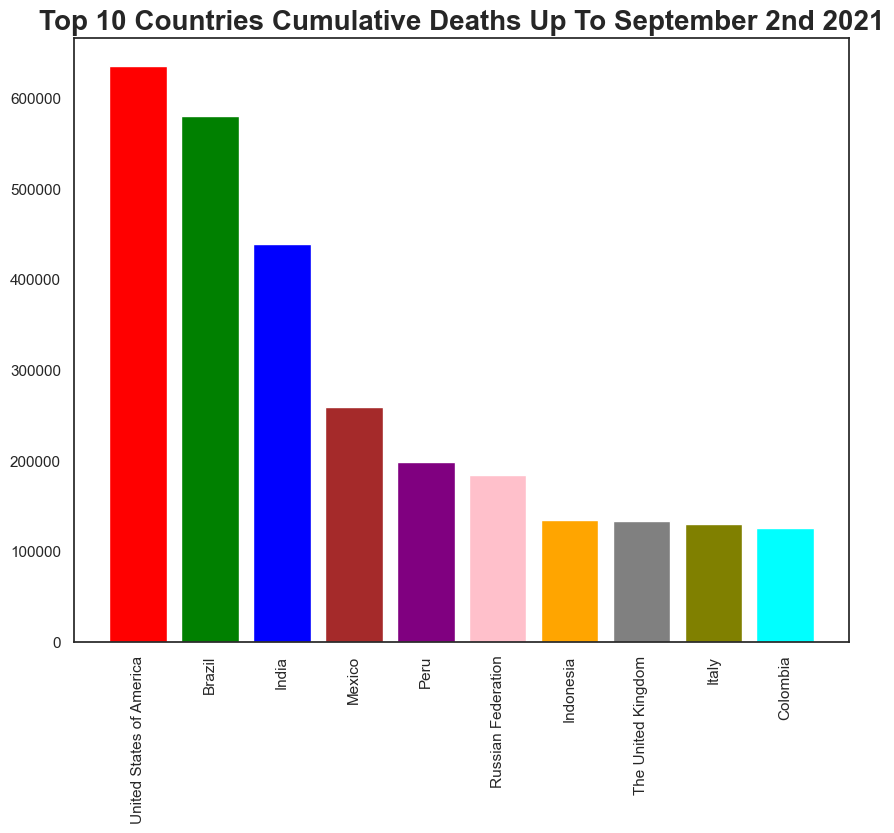

In [20]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative deaths
global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax.sort_values('Cumulative Deaths', ascending = False)
global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax_sorted_desc_deaths.iloc[:10]
plt.bar(global_cases_deaths_vax_sorted_desc_deaths['Country'], global_cases_deaths_vax_sorted_desc_deaths['Cumulative Deaths'], color = ['red','green','blue','brown', 'purple', 'pink', 'orange','gray', 'olive', 'cyan'])
plt.xticks(rotation = 90)
plt.title('Top 10 Countries Cumulative Deaths Up To September 2nd 2021', fontweight = 'bold', fontsize = 20)
plt.show()

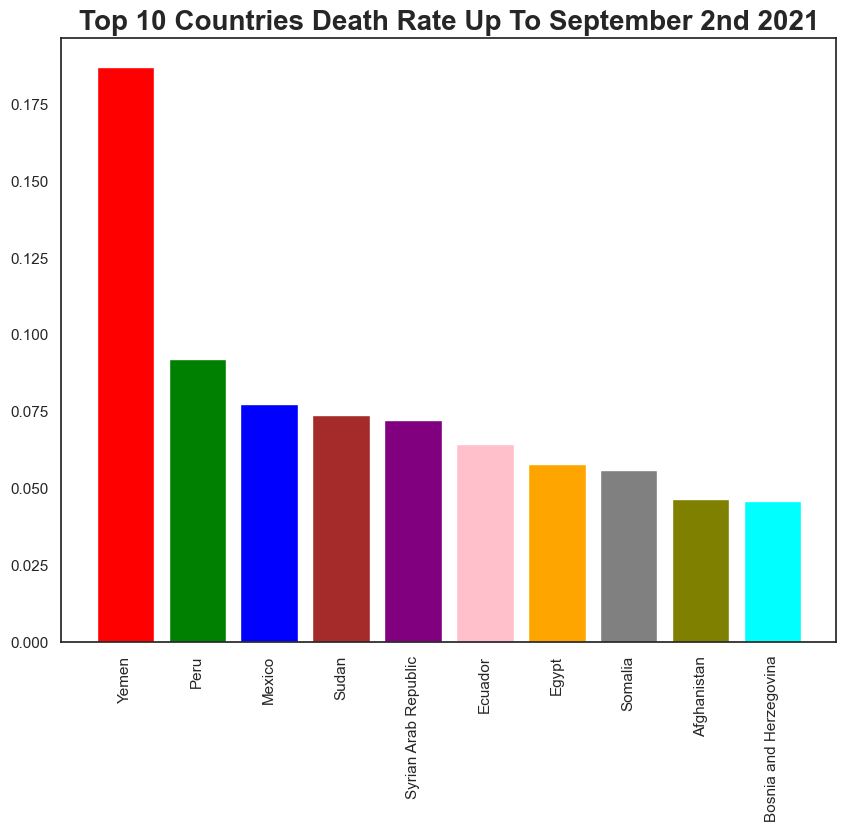

In [21]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest death rate
global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax.sort_values('Death Rate - Cumulative', ascending = False)
global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax_sorted_desc_death_rate.iloc[:10]
plt.bar(global_cases_deaths_vax_sorted_desc_death_rate['Country'], global_cases_deaths_vax_sorted_desc_death_rate['Death Rate - Cumulative'], color = ['red','green','blue','brown', 'purple', 'pink', 'orange','gray', 'olive', 'cyan'])
plt.xticks(rotation = 90)
plt.title('Top 10 Countries Death Rate Up To September 2nd 2021', fontweight = 'bold', fontsize = 20)
plt.show()

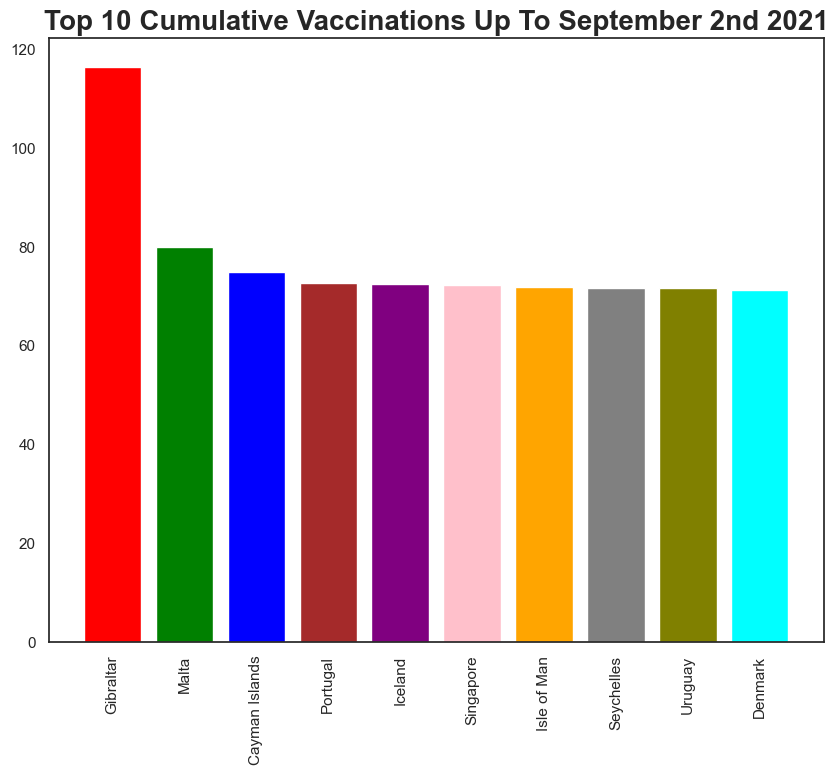

In [22]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest vaccination rate
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax.sort_values('Fully Vaccinated per 100', ascending = False)
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax_sorted_desc_vax.iloc[:10]
plt.bar(global_cases_deaths_vax_sorted_desc_vax['Country'], global_cases_deaths_vax_sorted_desc_vax['Fully Vaccinated per 100'], color = ['red','green','blue','brown', 'purple', 'pink', 'orange','gray', 'olive', 'cyan'])
plt.xticks(rotation = 90)
plt.title('Top 10 Cumulative Vaccinations Up To September 2nd 2021', fontweight = 'bold', fontsize = 20)
plt.show()

# Hypothesis testing Using the Pearson Correlation


**What is Pearson Correlation

This is a measure of linear correlation between two data sets.

Its the ration between covariance of two variables and the product of their standard deviation.

Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [23]:
vax_data = list(global_cases_deaths_vax['Fully Vaccinated per 100'])
death_rate_data = list(global_cases_deaths_vax['Death Rate - Cumulative'])
new_death_rate_last_7_days = list(global_cases_deaths_vax['Death Rate last 7 days'])

In [24]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = pearsonr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
 
    
print('______________________________________')

if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.29076, p=0.00004
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

In [25]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate last 7 days
stat, p = pearsonr(vax_data, new_death_rate_last_7_days)
print('stat=%.5f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.30662, p=0.00001
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

# Hypothesis testing Using the Spearman Rank Correlation

**What is Spearman Rank Correlation

This is to measure the monotonic relationship between two variable.


Stating the Null and Alternative Hypothesis

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [26]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = spearmanr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject H0')

    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO ')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.34643, p=0.00000
Probably the two data samples are dependent & we reject H0
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

In [27]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate last 7 days
stat, p = spearmanr(vax_data, new_death_rate_last_7_days)
print('stat=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
    
print('______________________________________')
    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.37099, p=0.00000
Probably the two data samples are dependent & we reject HO
______________________________________
Probably the two data samples are dependent & we reject HO


**Comments on results

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people who are vaccinated against covid-19 the fewer fatalities that are likely to occur.

# Visual illustration of the correlation

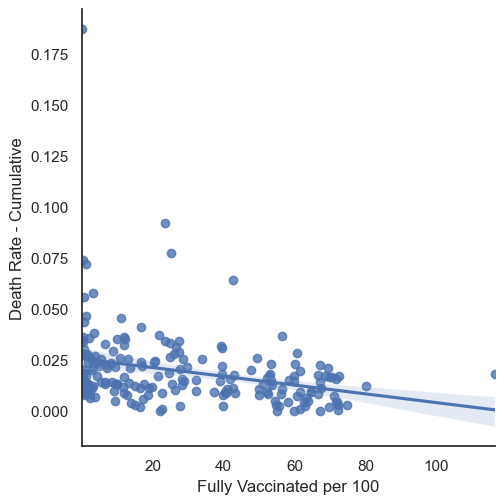

<Figure size 2000x1500 with 0 Axes>

In [28]:
sns.lmplot(x = 'Fully Vaccinated per 100', y = 'Death Rate - Cumulative', data = global_cases_deaths_vax)
plt.figure(figsize = (20,15))
plt.show()

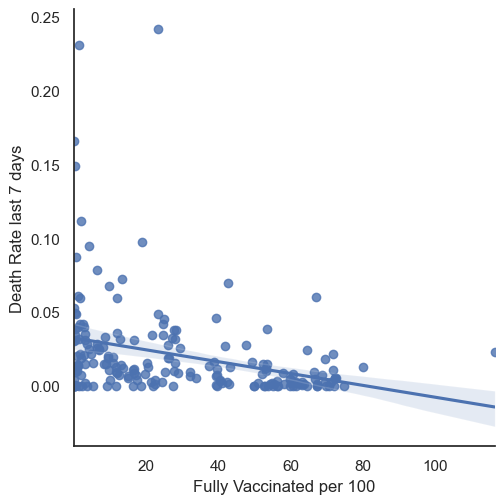

<Figure size 2000x1500 with 0 Axes>

In [29]:
sns.lmplot(x = 'Fully Vaccinated per 100', y = 'Death Rate last 7 days', data = global_cases_deaths_vax)
plt.figure(figsize = (20,15))
plt.show()

(3.5, -0.5)

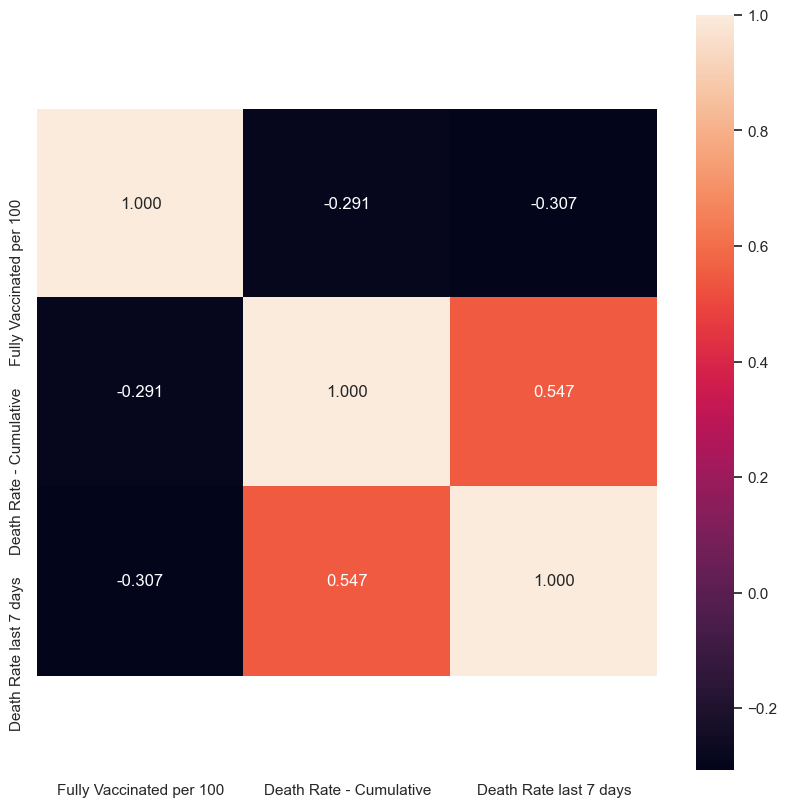

In [30]:
#Correlation using heatmap
global_cases_deaths_vax_2 = global_cases_deaths_vax[['Fully Vaccinated per 100', 'Death Rate - Cumulative', 'Death Rate last 7 days']]


plt.figure(figsize = (10,10))
ax = sns.heatmap(global_cases_deaths_vax_2.corr(), annot = True, fmt = '.3f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)